### Öğrenci Adı: Muhammet Rıdvan Elitemiz
### Öğrenci No: 151220103
### Veri Seti: Adult Census Income -> https://www.kaggle.com/uciml/adult-census-income
### Hedef: Kişilerin gelirlerinin 50 bin doların altında mı yoksa üstünde mi olduğunu tahmin etmek. (Üstünde ise 1, değilse 0)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("adult_data.csv")

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum() # Veri setinde eksik veri var mı diye kontrol ediyoruz.

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

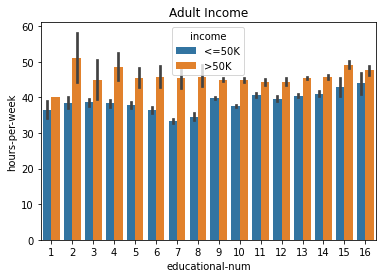

In [8]:
sns.barplot(x="educational-num", y="hours-per-week", hue="income", data=df).set_title("Adult Income"); # Eğitim seviyesi ve çalışma saatine göre gelir grafiği

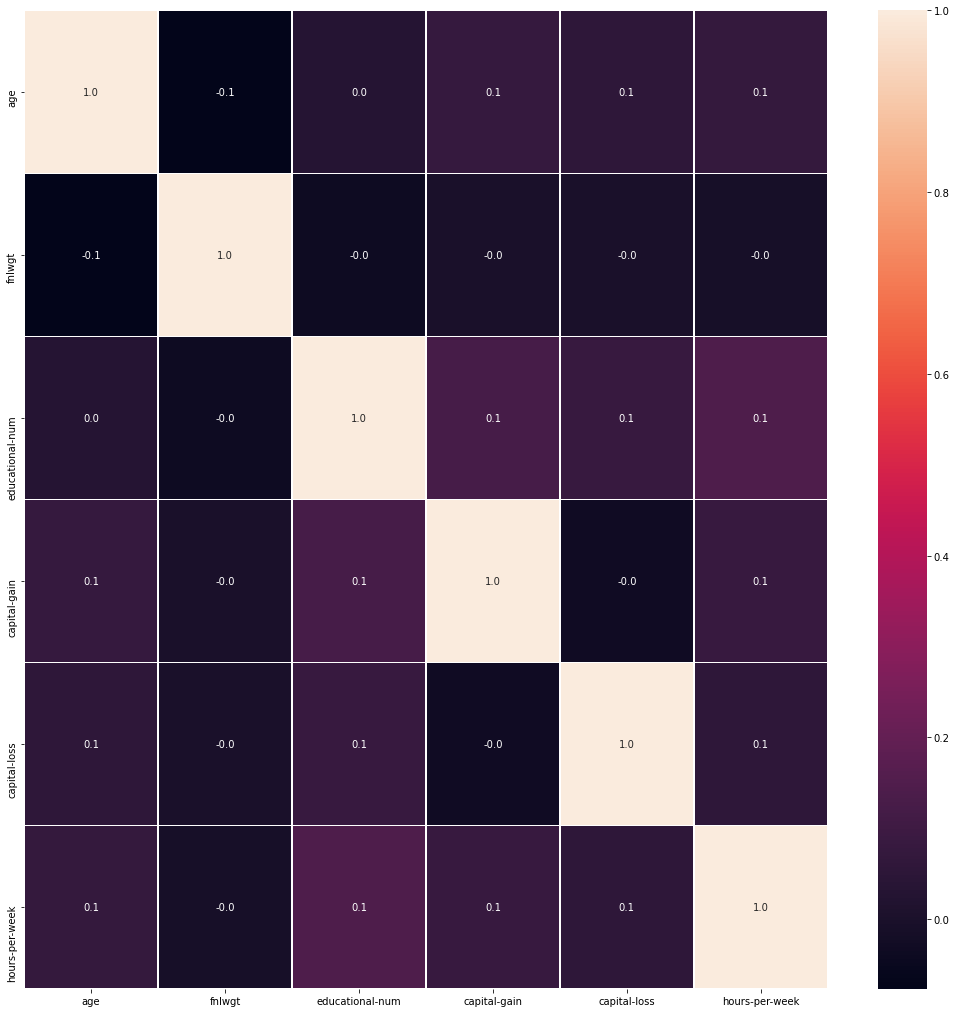

In [9]:
f,ax = plt.subplots(figsize=(18, 18))   # Veriler arasındaki ilişkiyi görmek için correlation matrix için heat map
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [10]:
df = df.drop(["race","fnlwgt","marital-status","relationship","native-country"], axis=1) # Irk, fnlwgt(temsil ettiği insan sayısı?), medeni durum, ilişki ve ülke bilgisine ihtiyacımız yok.

In [11]:
df.head(10) #Geriye kalan veri setimiz

,age,workclass,education,educational-num,occupation,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,11th,7,Machine-op-inspct,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Farming-fishing,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Protective-serv,Male,0,0,40,>50K
3,44,Private,Some-college,10,Machine-op-inspct,Male,7688,0,40,>50K
4,18,?,Some-college,10,?,Female,0,0,30,<=50K
5,34,Private,10th,6,Other-service,Male,0,0,30,<=50K
6,29,?,HS-grad,9,?,Male,0,0,40,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Prof-specialty,Male,3103,0,32,>50K
8,24,Private,Some-college,10,Other-service,Female,0,0,40,<=50K
9,55,Private,7th-8th,4,Craft-repair,Male,0,0,10,<=50K


### Veri setinde eksik veri yok demiştik. Ancak bu yanlış. Eksik veriler yerine '?' konulmuş.
### En sık geçen sınıflar ile bunları yok edeceğiz.

In [12]:
df['workclass'].value_counts() 

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [13]:
df['occupation'].value_counts() 

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [14]:
df['workclass'].replace('?', "Private", inplace=True) 
df['occupation'].replace('?', "Prof-specialty", inplace=True)

In [15]:
df.head(10)

,age,workclass,education,educational-num,occupation,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,11th,7,Machine-op-inspct,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Farming-fishing,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Protective-serv,Male,0,0,40,>50K
3,44,Private,Some-college,10,Machine-op-inspct,Male,7688,0,40,>50K
4,18,Private,Some-college,10,Prof-specialty,Female,0,0,30,<=50K
5,34,Private,10th,6,Other-service,Male,0,0,30,<=50K
6,29,Private,HS-grad,9,Prof-specialty,Male,0,0,40,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Prof-specialty,Male,3103,0,32,>50K
8,24,Private,Some-college,10,Other-service,Female,0,0,40,<=50K
9,55,Private,7th-8th,4,Craft-repair,Male,0,0,10,<=50K


In [16]:
from sklearn.preprocessing import KBinsDiscretizer                       # Sürekli verileri düzleştirmeye tabi tutuyoruz.
Xbin = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') # Yaş niteliğini 4 değerden oluşan kategorik veriye dönüştürme
df["age"] = Xbin.fit_transform(df[["age"]])

In [17]:
df.head(10)

,age,workclass,education,educational-num,occupation,gender,capital-gain,capital-loss,hours-per-week,income
0,0.0,Private,11th,7,Machine-op-inspct,Male,0,0,40,<=50K
1,2.0,Private,HS-grad,9,Farming-fishing,Male,0,0,50,<=50K
2,1.0,Local-gov,Assoc-acdm,12,Protective-serv,Male,0,0,40,>50K
3,2.0,Private,Some-college,10,Machine-op-inspct,Male,7688,0,40,>50K
4,0.0,Private,Some-college,10,Prof-specialty,Female,0,0,30,<=50K
5,1.0,Private,10th,6,Other-service,Male,0,0,30,<=50K
6,1.0,Private,HS-grad,9,Prof-specialty,Male,0,0,40,<=50K
7,3.0,Self-emp-not-inc,Prof-school,15,Prof-specialty,Male,3103,0,32,>50K
8,0.0,Private,Some-college,10,Other-service,Female,0,0,40,<=50K
9,3.0,Private,7th-8th,4,Craft-repair,Male,0,0,10,<=50K


In [18]:
# Hedef satırı 1-0 haline getiriyoruz.
df = pd.get_dummies(df,drop_first=True,columns=["income"])
df.head()

,age,workclass,education,educational-num,occupation,gender,capital-gain,capital-loss,hours-per-week,income_>50K
0,0.0,Private,11th,7,Machine-op-inspct,Male,0,0,40,0
1,2.0,Private,HS-grad,9,Farming-fishing,Male,0,0,50,0
2,1.0,Local-gov,Assoc-acdm,12,Protective-serv,Male,0,0,40,1
3,2.0,Private,Some-college,10,Machine-op-inspct,Male,7688,0,40,1
4,0.0,Private,Some-college,10,Prof-specialty,Female,0,0,30,0


In [19]:
X = df.drop(['income_>50K'], axis=1)

y = df['income_>50K']

In [20]:
#Veri setimizi %70 eğitim ve %30 test olarak ikiye bölüyoruz.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [21]:
X_train.shape, X_test.shape # Eğitim ve test verilerimizin satır - sütun bilgileri

((34189, 9), (14653, 9))

In [22]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O'] # Kategorik verileri bulma
print("Kategorik: ",categorical)

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']   # Numerik verileri bulma
print("Numerik: ",numerical)


Kategorik:  ['workclass', 'education', 'occupation', 'gender']
Numerik:  ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [23]:
import category_encoders as ce

In [24]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'occupation',    # Kategorik verilere encoding uyguluyoruz.
                               'gender'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\MRE\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [25]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_1,...,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,gender_1,gender_2,capital-gain,capital-loss,hours-per-week
42392,0.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,40
14623,3.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,17
27411,1.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,40
1288,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,50
7078,0.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [26]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_1,...,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,gender_1,gender_2,capital-gain,capital-loss,hours-per-week
7762,3.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,40
23881,0.0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,40
30507,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,14344,0,40
28911,1.0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,40
19484,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,30


### Veri setinde Naive Bayes modeli ile karar verme

In [27]:
#Gaussian Naive Bayes modeli uygulaması

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

In [29]:
from sklearn.metrics import accuracy_score

print('Model doğruluk skoru: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Eğitim seti doğruluk skoru: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model doğruluk skoru: 0.8202
Eğitim seti doğruluk skoru: 0.8138


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10210,  1023],
       [ 1611,  1809]], dtype=int64)

In [31]:
pd.crosstab(y_test, y_pred, rownames=['Gerçek'], colnames=['Tahmin Edilen'], margins=True)

Tahmin Edilen,0,1,All
Gerçek,,,
0,10210,1023,11233
1,1611,1809,3420
All,11821,2832,14653


### Model doğruluğu eğitim setinden daha yüksek ancak birbirine yakın olduğu için kabul ediyoruz. 
### Fark çok yüksek olsaydı overfitting problemi var demekti ve bunu çözmemiz gerekirdi. 

In [32]:
import pickle
with open('Income_Naive.pkl', 'wb') as f:
        pickle.dump(gnb, f)

### Veri setinde Karar Ağacı modeli ile karar verme

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Eğitim seti doğruluk skoru: ", accuracy_score(y_train,y_pred))
print("Eğitim seti F1 skoru:", f1_score(y_train,y_pred))

print("Sonuç için ortalama F1 skoru: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Ortalama sonuç doğruluk skoru: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Eğitim seti doğruluk skoru:  0.9051156804820264
Eğitim seti F1 skoru: 0.7801274230717095
Sonuç için ortalama F1 skoru:  0.7363103359551739
Ortalama sonuç doğruluk skoru:  0.8197373700375984


### F1 skoru: F1 Score değeri bize kesinlik (Precision) ve duyarlılık (Recall) değerlerinin harmonik ortalamasını göstermektedir.
### Eğitim seti doğruluğu yüksek. Bunu düzenlemek için ağaçta derinliklere bakalım.

<AxesSubplot:xlabel='Derinlik', ylabel='Değerler'>

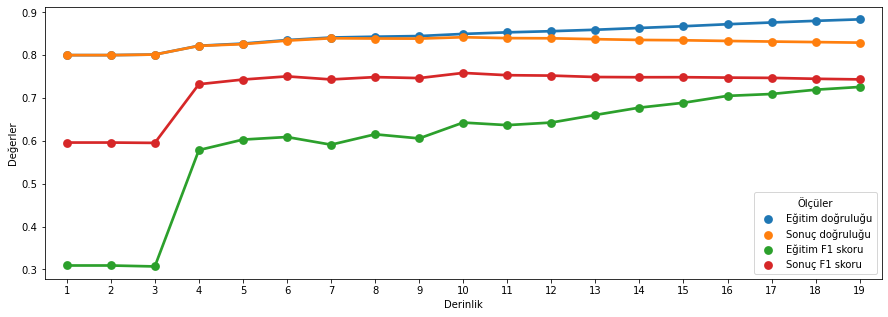

In [34]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Eğitim doğruluğu": training_accuracy, "Sonuç doğruluğu": val_accuracy, "Eğitim F1 skoru": training_f1, "Sonuç F1 skoru":val_f1, "Derinlik": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Derinlik',var_name='Ölçüler',value_name="Değerler")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Derinlik", y="Değerler",hue="Ölçüler", data=plot_df,ax=ax)

### Grafikten anlıyoruz ki ideal verim için derinliği 8-9 seçmeliyiz. Biz 8 seçiyoruz.

<AxesSubplot:xlabel='Minimum Örnek Yaprak', ylabel='Değerler'>

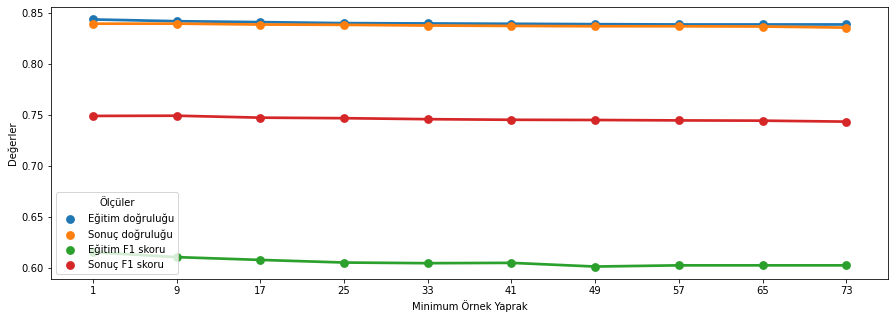

In [35]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,8): ### Yaprak başına %1 örnekten %10 örneğe kadar gidiyor.
    tree_clf = DecisionTreeClassifier(max_depth=8,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Eğitim doğruluğu": training_accuracy, "Sonuç doğruluğu": val_accuracy, "Eğitim F1 skoru": training_f1, "Sonuç F1 skoru":val_f1, "Minimum Örnek Yaprak": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Minimum Örnek Yaprak',var_name='Ölçüler',value_name="Değerler")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Minimum Örnek Yaprak", y="Değerler",hue="Ölçüler", data=plot_df,ax=ax)

In [36]:
tree_clf = DecisionTreeClassifier(max_depth=8,min_samples_leaf = 17)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Sonuç Doğruluğu: ",accuracy_score(y_test,y_pred))
print("Test verisinde karışıklık matrisi: ")
pd.crosstab(y_test, y_pred, rownames=['Gerçek'], colnames=['Tahmin Edilen'], margins=True)

Sonuç Doğruluğu:  0.8434450283218453
Test verisinde karışıklık matrisi: 


Tahmin Edilen,0,1,All
Gerçek,,,
0,10577,656,11233
1,1638,1782,3420
All,12215,2438,14653


In [37]:
with open('Income_KararAgaci.pkl', 'wb') as f:
        pickle.dump(tree_clf, f)

### Veri setinde KNN modeli ile karar verme

In [38]:
from sklearn.neighbors import KNeighborsClassifier

#Eğitim ve test doğruluklarını tutmak için diziler oluşturuluyor.
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #k adet komşu ile çalışacak bir KNN modeli kuruluyor.
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Verileri modele veriliyor.
    knn.fit(X_train, y_train)
    
    #Eğitim ve test doğrulukları hesaplanıyor.
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

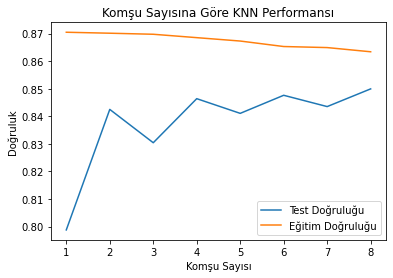

In [39]:
plt.title('Komşu Sayısına Göre KNN Performansı')
plt.plot(neighbors, test_accuracy, label='Test Doğruluğu')
plt.plot(neighbors, train_accuracy, label='Eğitim Doğruluğu')
plt.legend()
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')
plt.show()

# Veri sayısı yüksek olduğu için işlem uzun sürebiliyor

### Grafik üzerinden hem eğitim hem test doğruluğu için ideal bir komşu sayısı bulmaya çalışıyoruz.
### 8 komşuyu seçiyoruz.

In [40]:
knn = KNeighborsClassifier(n_neighbors=8)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [46]:
print("Eğitim Doğruluğu: ",knn.score( X_train,y_train))
print("Test Doğruluğu: ",knn.score(X_test,y_test))

Eğitim Doğruluğu:  0.8633771095966539
Test Doğruluğu:  0.8499283423189791


In [43]:
y_pred = knn.predict(X_test)

In [44]:
pd.crosstab(y_test, y_pred, rownames=['Gerçek'], colnames=['Tahmin Edilen'], margins=True)

Tahmin Edilen,0,1,All
Gerçek,,,
0,10656,577,11233
1,1622,1798,3420
All,12278,2375,14653


In [45]:
with open('Income_KNN.pkl', 'wb') as f:
        pickle.dump(knn, f)